<a href="https://colab.research.google.com/github/Hertie-School-Machine-Learning-F2022/Class_lab_04/blob/main/Notes_Lab_04_GRAD_C24_fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proprocessing

Types of data:
Numerical | categorical (Do we have more names for these two?)

What about ordinal? 
Examples of ordinal? 

We will first take a look at preprocessing data for numerical data. 

In [215]:
# Import some libraries that we will use

import pandas as pd
import matplotlib.pylab as plt

There are multiple ways to load data into a google colab notebook, let's take a look at one that takes a file from your local machine, and allows you to run it in the cloud.

In [216]:
# First upload the file to the session

from google.colab import files
uploaded = files.upload()

Saving preproc1.csv to preproc1 (1).csv


In [217]:
# Then read the file as a csv

import io
df = pd.read_csv(io.BytesIO(uploaded['preproc1.csv']))

We can take a look at the data

In [218]:
# We can take a look at the first couple of samples
df.head()

,var1,var2,temp
0,58,1128,hot
1,239,1237,hot
2,156,1433,hot
3,262,1421,hot
4,185,1541,hot


In [219]:
# We can also get a statistical description of the data
df.describe()

,var1,var2
count,252.000000,252.000000
mean,1139.968254,1199.888889
std,843.646580,352.512354
min,-59.000000,-174.000000
25%,332.750000,1039.500000
50%,1051.500000,1207.000000
75%,1800.000000,1410.250000
max,2880.000000,2570.000000


In [220]:
# How can we set X and y values with our own data?

X = df[['var1', 'var2']]

y = df['temp'] == 'hot'

In [221]:
X

,var1,var2
0,58,1128
1,239,1237
2,156,1433
3,262,1421
4,185,1541
...,...,...
247,186,207
248,54,7
249,46,118
250,111,61


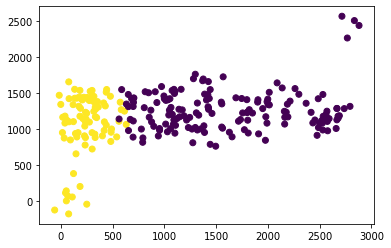

In [222]:
# How does the data look after seeing the description?

plt.scatter(df['var1'], df['var2'], c=y);

First type of preprocessing that we have already seen: Standard Scaler

z = (x - u) / s

where u is the mean of the training samples , and s is the standard deviation of the training samples.


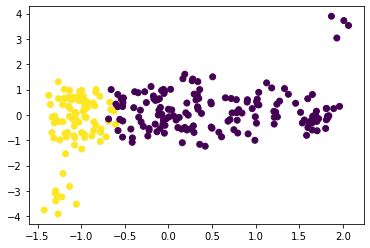

In [227]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

Let's look at another type of 'scaler' the Quantile transformer

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

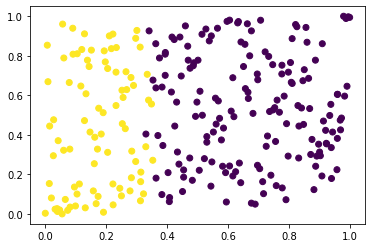

In [228]:
# QuantileTransformer

from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer(n_quantiles = 100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

What other preprocesing strategies do we know? 

Interactions and polynomials

What does an interaction do? 

How does a polynomial behave? X^2, X^3...?

Let's take a look at more complex data

In [244]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['preproc2.csv']))

Saving preproc2.csv to preproc2 (3).csv


In [272]:
df

,var1,var2,temp
0,89,12,0
1,29,62,1
2,20,138,0
3,35,164,0
4,25,38,1
...,...,...,...
212,114,172,1
213,29,165,0
214,57,130,1
215,98,29,0


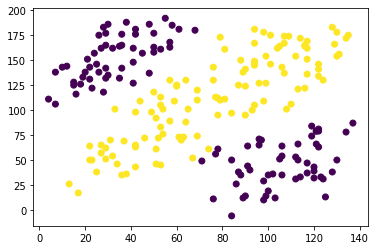

In [273]:
X = df[['var1', 'var2']]
y = df['temp'] == 1
plt.scatter(X['var1'], X['var2'], c=y);

# We can see that this data can not be separeted into two simple classes
# with a line like logistic regression would do

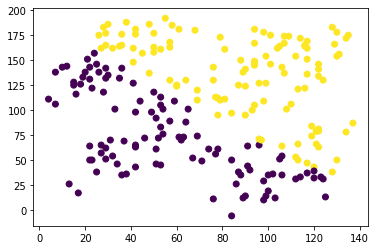

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X['var1'], X['var2'], c=pred);

Nonlinear features

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 

For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [275]:
# Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

X_new = PolynomialFeatures().fit_transform(X)

X_new = pd.DataFrame(X_new)

X_new.rename(columns={0:"1",
                      1:"a",
                      2:"b",
                      3:"a^2",
                      4:"ab",
                      5:"b^2"
                      } ,inplace=True)
X_new

,1,a,b,a^2,ab,b^2
0,1.0,89.0,12.0,7921.0,1068.0,144.0
1,1.0,29.0,62.0,841.0,1798.0,3844.0
2,1.0,20.0,138.0,400.0,2760.0,19044.0
3,1.0,35.0,164.0,1225.0,5740.0,26896.0
4,1.0,25.0,38.0,625.0,950.0,1444.0
...,...,...,...,...,...,...
212,1.0,114.0,172.0,12996.0,19608.0,29584.0
213,1.0,29.0,165.0,841.0,4785.0,27225.0
214,1.0,57.0,130.0,3249.0,7410.0,16900.0
215,1.0,98.0,29.0,9604.0,2842.0,841.0


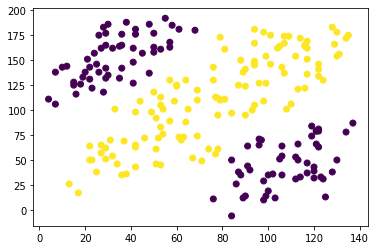

In [276]:
# Now lets implement the prediction pipeline again and see how 
# it behaves 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ("stdsclr", StandardScaler()),
    ("poly", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred);

For categorical data

what is categorical data?

How can we preprocess categorical data?

In [277]:
# We will create a fake array to take a look at one hot encoder or 'dummy encoding' 

arr = np.array(["always", "almost always", "almost never", "never"]).reshape(-1, 1)
arr

array([['always'],
       ['almost always'],
       ['almost never'],
       ['never']], dtype='<U13')

In [278]:
# One hot encoding - dummy encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
enc.fit_transform(arr)
print(enc.categories_)
enc.fit_transform(arr)

[array(['almost always', 'almost never', 'always', 'never'], dtype='<U13')]


array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
# What happens if we add a new category that it has never seen?
enc.transform([["zero"]])

In [279]:
# we need to set the parameter 'handle unknown' to 'ignore'

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)
enc.transform([["zero"]])

array([[0., 0., 0., 0.]])

With all this information, we are ready for a full pipeline with both
categorical and numerical data

In [280]:
# Let's create a fake dataset with mixed data types

parents = [0,1,2,2,1]
years = [5,5,4,3,4]
sex = ['M', 'F', 'F', 'M', 'M']
rent = ['R', 'O', 'R', 'R', 'O']

df = {'parents':parents,
      'years':years,
      'sex':sex,
      'rent':rent}

df = pd.DataFrame(df)
df

,parents,years,sex,rent
0,0,5,M,R
1,1,5,F,O
2,2,4,F,R
3,2,3,M,R
4,1,4,M,O


In [281]:
# First transform the sex variable

ohe = OneHotEncoder(sparse = False)

ohe.fit_transform(df[['sex']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [282]:
ohe.categories_

[array(['F', 'M'], dtype=object)]

In [283]:
# For the pipeline to preprocess both categorical and numerical data
# we need a column transformer

from sklearn.compose import make_column_transformer

column_trans = make_column_transformer(
    (OneHotEncoder(), ['sex', 'rent']),
    (StandardScaler(), ['parents', 'years']),
    remainder = 'passthrough')

column_trans.fit_transform(df)

array([[ 0.        ,  1.        ,  0.        ,  1.        , -1.60356745,
         1.06904497],
       [ 1.        ,  0.        ,  1.        ,  0.        , -0.26726124,
         1.06904497],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  1.06904497,
        -0.26726124],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  1.06904497,
        -1.60356745],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.26726124,
        -0.26726124]])

Now we will fit a full pipeline with a real data set that has both numerical and categorical data of abalones (shellfish) and try to predict the age of the ablone (less than 11 years old or more than 11 years old)

In [284]:
from google.colab import files
uploaded = files.upload()


Saving abalone.csv to abalone (1).csv


In [285]:
import io
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))

In [286]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Older
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1


In [287]:
# We will drop Rings, Age (Rings + 1.5), and Older because it is what we are trying
# to classify, and set X

X = df.drop(columns=['Rings', 'Age', 'Older'])

# We will set y to 'Older'
y = df['Older']

In [288]:
# What X looks like now

X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [289]:
# We will do a train test split to begin out pipeline

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [290]:
# Now lets set a column_trans step to make sure the model can handel all of our
# data in the process

column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex']),
    remainder = StandardScaler())

In [291]:
# We can now implement the whole pipeline to classify abalones 

from sklearn.model_selection import cross_val_score

# Use a logistic regression model 

clf = LogisticRegression()

# Prepare our piple with 1.- Preprocessing step and 2.- Logistic Regression

pipe = Pipeline([('prepros', column_trans), ('model', clf)])

# We will do cross validation on the train set, 3 times

cv_results = cross_val_score(pipe, X_train, y_train, cv=3)
print(cv_results)


[0.78639847 0.8045977  0.76532567]
